In [ ]:
##Alpkaan TANIŞ 170255061 İ.Ö
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data-1.xlsx')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


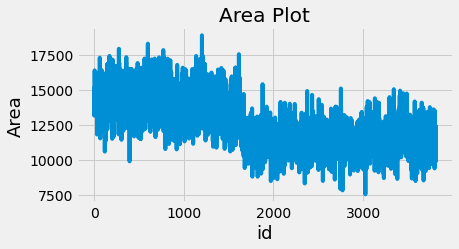

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Area Plot')
plt.plot(df['Area'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Area',fontsize=18)
plt.show()

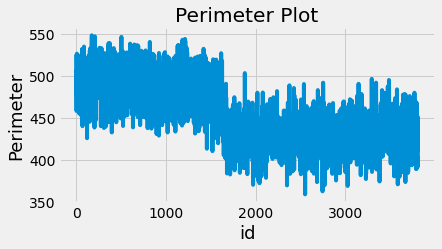

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Perimeter Plot')
plt.plot(df['Perimeter'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Perimeter',fontsize=18)
plt.show()

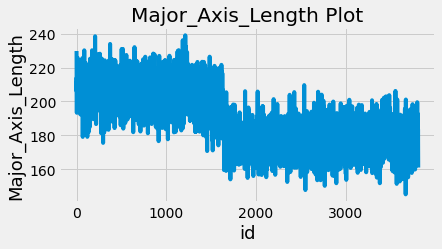

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Major_Axis_Length Plot')
plt.plot(df['Major_Axis_Length'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Major_Axis_Length',fontsize=18)
plt.show()

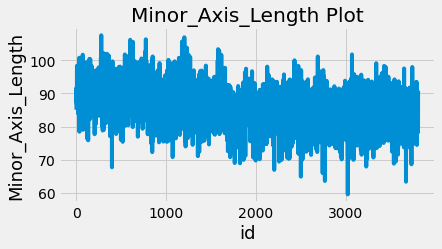

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Minor_Axis_Length Plot')
plt.plot(df['Minor_Axis_Length'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Minor_Axis_Length',fontsize=18)
plt.show()

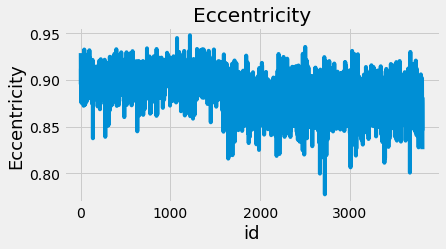

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Eccentricity')
plt.plot(df['Eccentricity'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Eccentricity',fontsize=18)
plt.show()

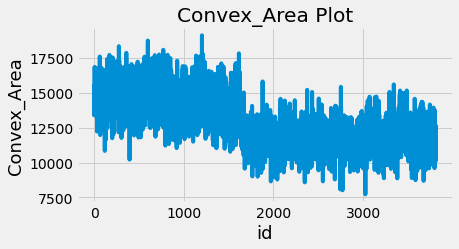

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Convex_Area Plot')
plt.plot(df['Convex_Area'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Convex_Area',fontsize=18)
plt.show()

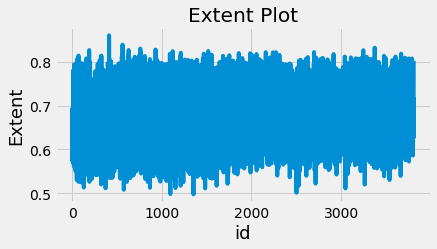

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Extent Plot')
plt.plot(df['Extent'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Extent',fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder  ## Kategorik veriyi nümerik hale getirme
le=LabelEncoder()
df['Class']=le.fit_transform(df.Class)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,1
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,1
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,1
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,1


In [ ]:
X = df.drop(['Eccentricity','Extent','Class','Minor_Axis_Length'], axis=1).values #ozellik secme
y = df['Class'].values #output 
X

array([[15231.        ,   525.57897949,   229.74987793, 15617.        ],
       [14656.        ,   494.31100464,   206.02006531, 15072.        ],
       [14634.        ,   501.12200928,   214.10678101, 14954.        ],
       ...,
       [12437.        ,   442.49899292,   183.57292175, 12645.        ],
       [ 9882.        ,   392.29699707,   161.19398499, 10097.        ],
       [11434.        ,   404.70999146,   161.07926941, 11591.        ]])

In [ ]:
X.shape,y.shape

((3810, 4), (3810,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)
print(X_train.shape,X_test.shape,X_valid.shape)

(2743, 4) (762, 4) (305, 4)


In [ ]:
from os import name
model=Sequential()
model.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=600,batch_size=50)

Epoch 1/600
55/55 [==============================] - 0s 2ms/step - loss: 0.9634 - accuracy: 0.7714 - val_loss: 2.6432 - val_accuracy: 0.5377
Epoch 2/600
55/55 [==============================] - 0s 2ms/step - loss: 1.3211 - accuracy: 0.7481 - val_loss: 1.1348 - val_accuracy: 0.7049
Epoch 3/600
55/55 [==============================] - 0s 2ms/step - loss: 2.1042 - accuracy: 0.6526 - val_loss: 1.1417 - val_accuracy: 0.7508
Epoch 4/600
55/55 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.7630 - val_loss: 1.5980 - val_accuracy: 0.6426
Epoch 5/600
55/55 [==============================] - 0s 2ms/step - loss: 1.2004 - accuracy: 0.7412 - val_loss: 0.7470 - val_accuracy: 0.7508
Epoch 6/600
55/55 [==============================] - 0s 2ms/step - loss: 2.0136 - accuracy: 0.6734 - val_loss: 0.3271 - val_accuracy: 0.8951
Epoch 7/600
55/55 [==============================] - 0s 2ms/step - loss: 1.4602 - accuracy: 0.7386 - val_loss: 0.3525 - val_accuracy: 0.8787
Epoch 8/600
5

In [ ]:
scores=model.evaluate(X_test,y_test,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)


762/762 [==============================] - 1s 2ms/step - loss: 0.2882 - accuracy: 0.9173
Loss: 0.2881530523300171
Accuracy: 91.73228144645691


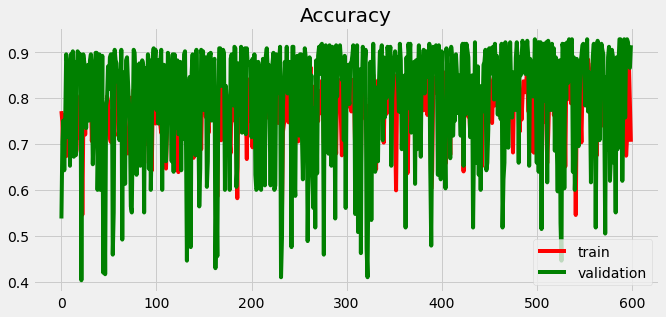

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='g',label='validation')
plt.legend(loc='best')


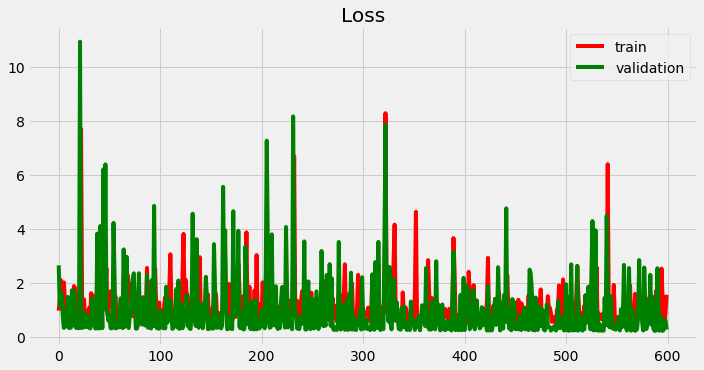

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='g',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

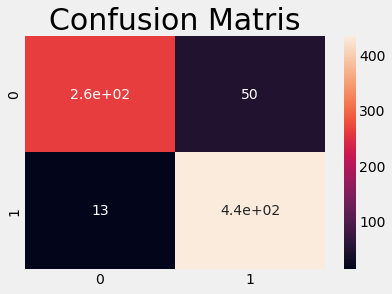

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred.shape
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
conf = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))
print("--------------")
print(conf)
print("----------------")
Sensitivity=conf[0][0]/(conf[0][0]+conf[1][0])
Specificity=conf[1][1]/(conf[1][1]+conf[0][1])
print("Specificity",Specificity)
print("Sensitivity",Sensitivity)
print("f1-score:",f1_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("accuracy:",accuracy_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       314
           1       0.90      0.97      0.93       448

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

--------------
[[264  50]
 [ 13 435]]
----------------
Specificity 0.8969072164948454
Sensitivity 0.9530685920577617
f1-score: 0.932475884244373
precision: 0.8969072164948454
accuracy: 0.9173228346456693
recall: 0.9709821428571429


In [ ]:
from os import name
model_sgd=Sequential()
model_sgd.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_sgd.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_sgd.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_sgd.summary()
model_sgd.compile(loss='binary_crossentropy',optimizer="SGD",metrics=['accuracy'])
history_sgd=model_sgd.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 6ms/step - loss: 2493037.0000 - accuracy: 0.5640 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5647 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 3/200
55/55 [=============

In [ ]:
from os import name
model_adamax=Sequential()
model_adamax.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_adamax.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_adamax.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_adamax.summary()
model_adamax.compile(loss='binary_crossentropy',optimizer="adamax",metrics=['accuracy'])
history_adamax=model_adamax.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 11ms/step - loss: 2812.5183 - accuracy: 0.5647 - val_loss: 1658.2599 - val_accuracy: 0.6000
Epoch 2/200
55/55 [==============================] - 0s 5ms/step - loss: 880.3958 - accuracy: 0.5647 - val_loss: 21.6602 - val_accuracy: 0.6000
Epoch 3/200
55/55 [=========

In [ ]:
from os import name
model_adadelta=Sequential()
model_adadelta.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_adadelta.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_adadelta.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_adadelta.summary()
model_adadelta.compile(loss='binary_crossentropy',optimizer="adadelta",metrics=['accuracy'])
history_adadelta=model_adadelta.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 5ms/step - loss: 616.2762 - accuracy: 0.5647 - val_loss: 568.1556 - val_accuracy: 0.6000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 614.9794 - accuracy: 0.5647 - val_loss: 566.9274 - val_accuracy: 0.6000
Epoch 3/200
55/55 [===========

In [ ]:
from os import name
model_adagrad=Sequential()
model_adagrad.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_adagrad.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_adagrad.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_adagrad.summary()
model_adagrad.compile(loss='binary_crossentropy',optimizer="adagrad",metrics=['accuracy'])
history_adagrad=model_adagrad.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 5ms/step - loss: 1277.8044 - accuracy: 0.5647 - val_loss: 1021.6107 - val_accuracy: 0.6000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 998.5333 - accuracy: 0.5647 - val_loss: 827.0663 - val_accuracy: 0.6000
Epoch 3/200
55/55 [=========

In [ ]:
from os import name
model_FTRL=Sequential()
model_FTRL.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_FTRL.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_FTRL.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_FTRL.summary()
model_FTRL.compile(loss='binary_crossentropy',optimizer="FTRL",metrics=['accuracy'])
history_FTRL=model_FTRL.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 4ms/step - loss: 239.1965 - accuracy: 0.5647 - val_loss: 118.4691 - val_accuracy: 0.6000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 58.8465 - accuracy: 0.5633 - val_loss: 2.0268 - val_accuracy: 0.4525
Epoch 3/200
55/55 [=============

In [ ]:
from os import name
model_nadam=Sequential()
model_nadam.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_nadam.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_nadam.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_nadam.summary()
model_nadam.compile(loss='binary_crossentropy',optimizer="nadam",metrics=['accuracy'])
history_nadam=model_nadam.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 2s 5ms/step - loss: 1374.6019 - accuracy: 0.4353 - val_loss: 852.9644 - val_accuracy: 0.4000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 412.4941 - accuracy: 0.4353 - val_loss: 8.1901 - val_accuracy: 0.4459
Epoch 3/200
55/55 [============

In [ ]:
from os import name
model_rmsprop=Sequential()
model_rmsprop.add(Dense(6,activation='relu',input_dim=4,name='Dense_Katman1'))
model_rmsprop.add(Dense(10,activation='relu',name='Dense_Katman6',use_bias=True))
model_rmsprop.add(Dense(1,activation='sigmoid',name='Dense_Katman7'))
model_rmsprop.summary()
model_rmsprop.compile(loss='binary_crossentropy',optimizer="rmsprop",metrics=['accuracy'])
history_rmsprop=model_rmsprop.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Katman1 (Dense)       (None, 6)                 30        
                                                                 
 Dense_Katman6 (Dense)       (None, 10)                70        
                                                                 
 Dense_Katman7 (Dense)       (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 1s 4ms/step - loss: 78.4717 - accuracy: 0.5016 - val_loss: 64.6043 - val_accuracy: 0.4000
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 37.3411 - accuracy: 0.4871 - val_loss: 42.1376 - val_accuracy: 0.6000
Epoch 3/200
55/55 [==============

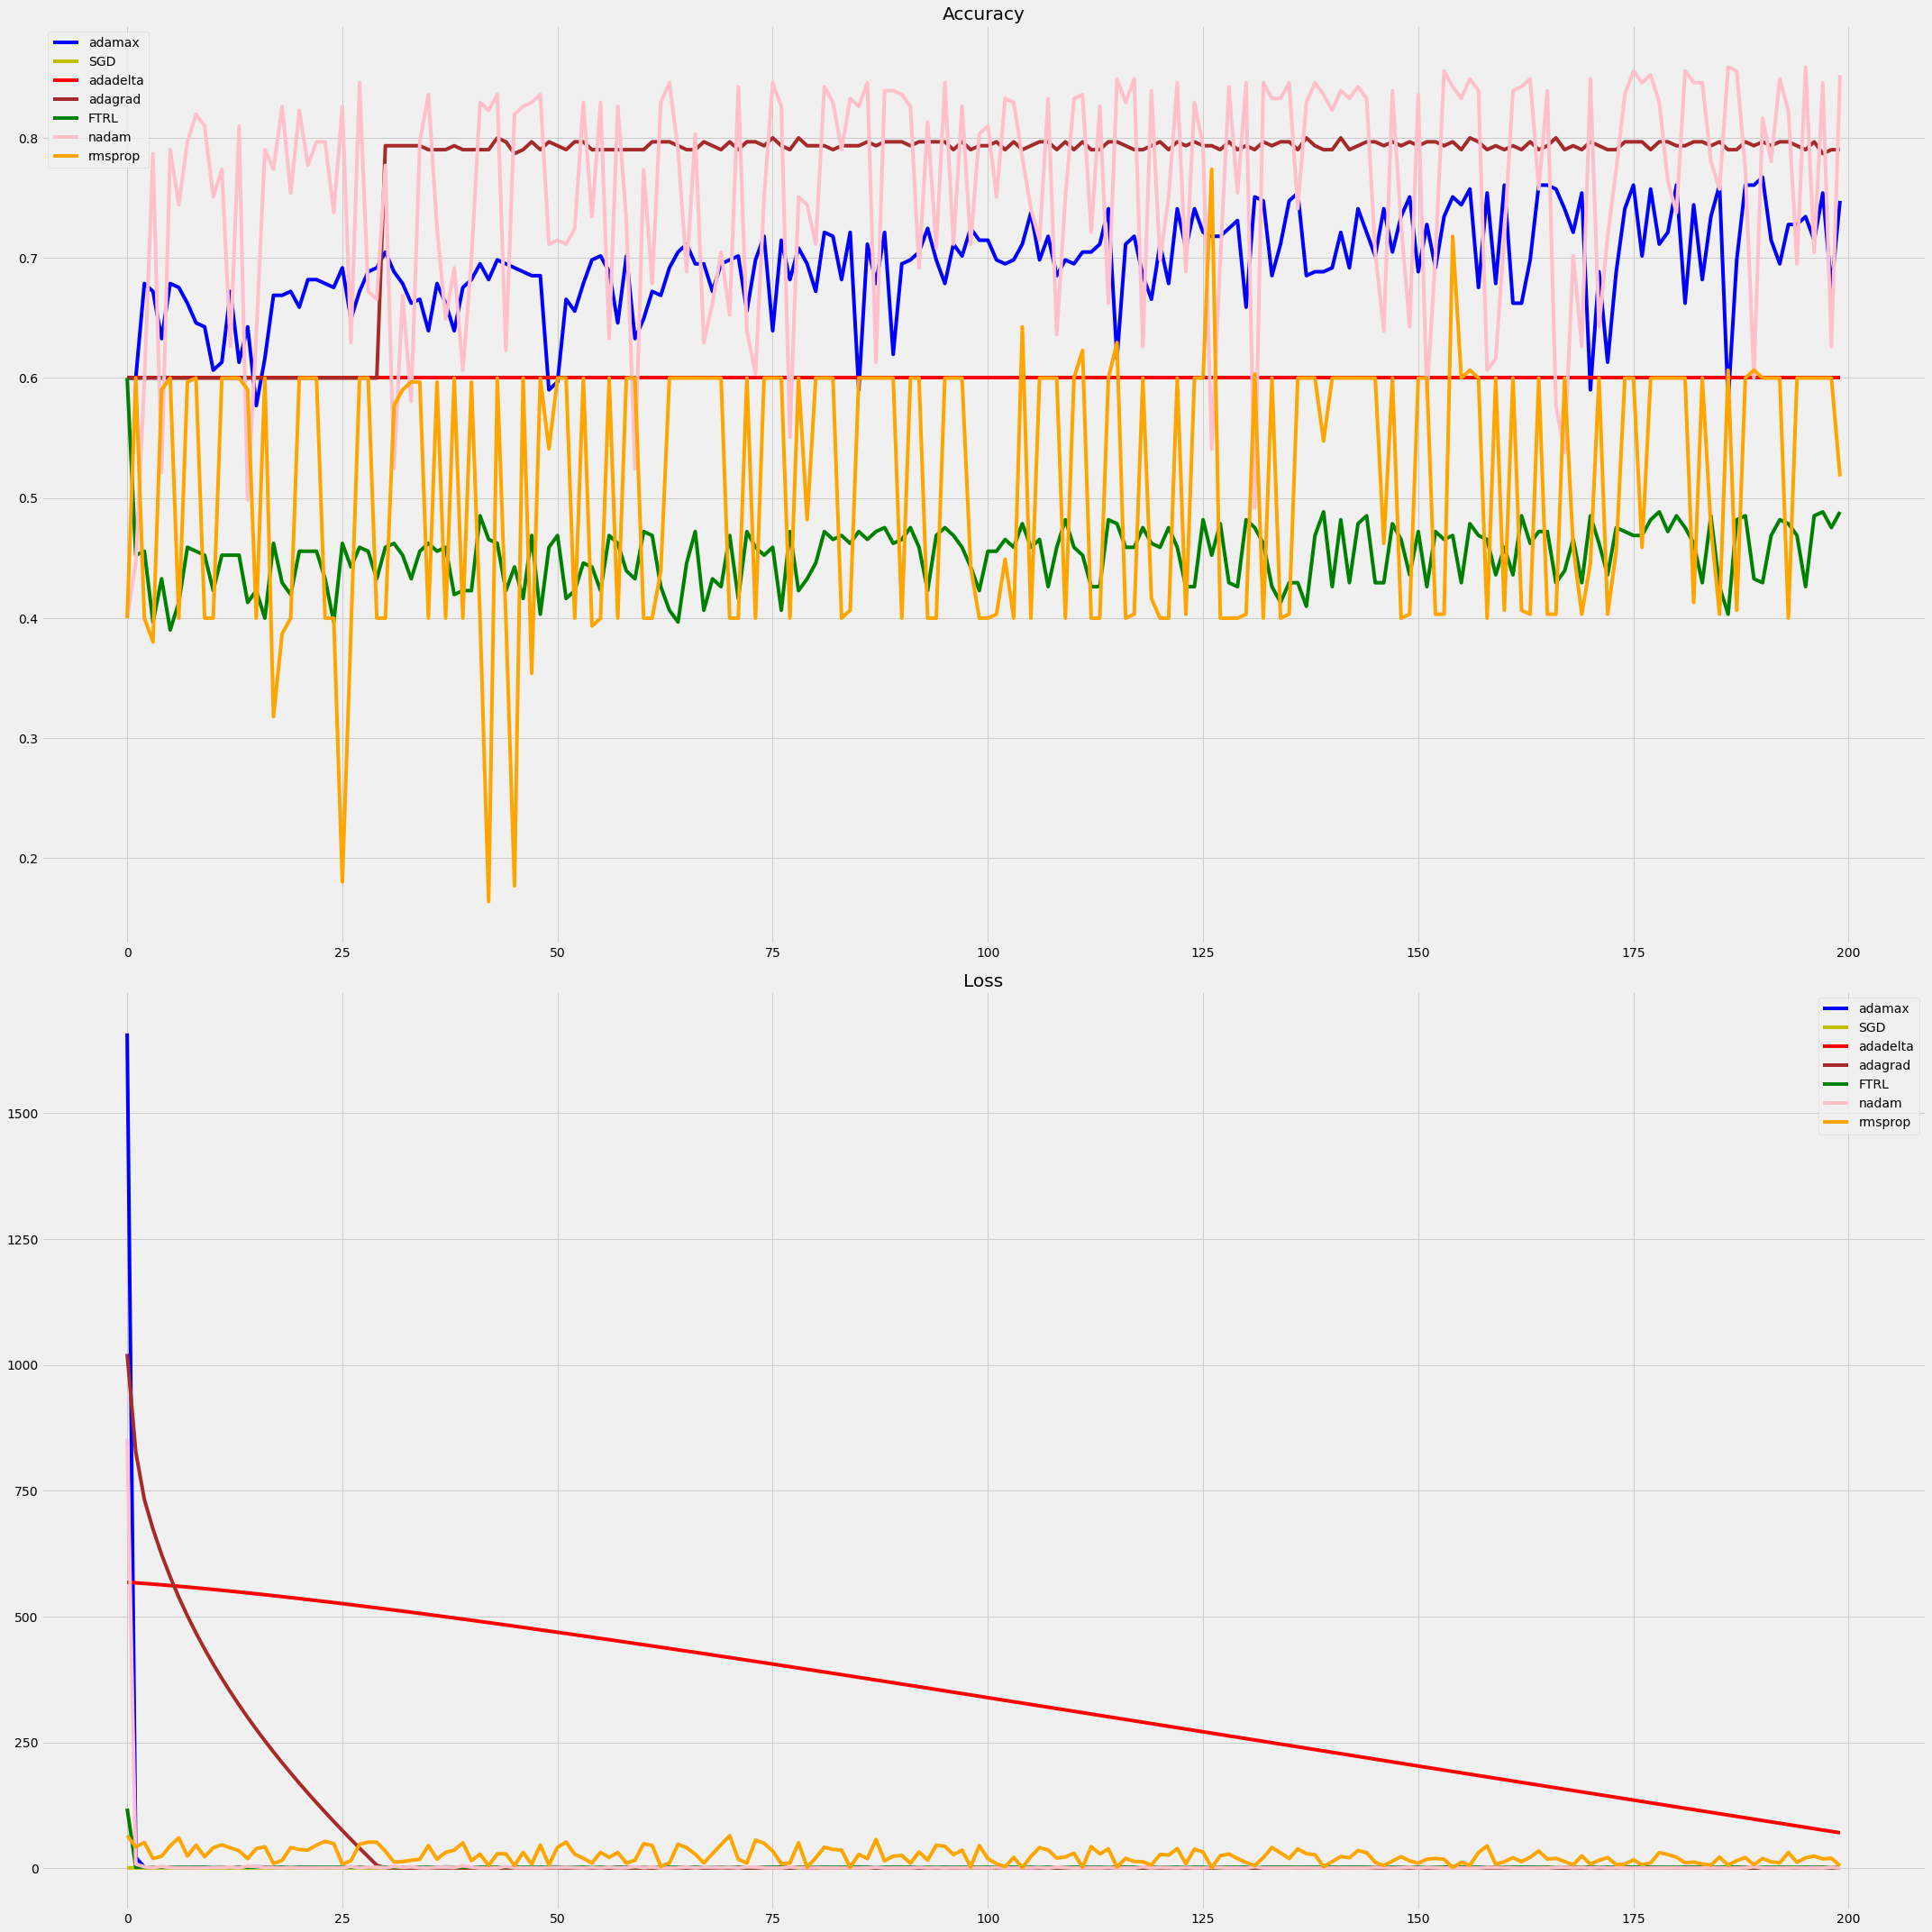

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,30))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history_adamax.history["val_accuracy"],color='b',label='adamax')
plt.plot(history_sgd.history["val_accuracy"],color='y',label='SGD')
plt.plot(history_adadelta.history["val_accuracy"],color='r',label='adadelta')
plt.plot(history_adagrad.history["val_accuracy"],color='brown',label='adagrad')
plt.plot(history_FTRL.history["val_accuracy"],color='g',label='FTRL')
plt.plot(history_nadam.history["val_accuracy"],color='pink',label='nadam')
plt.plot(history_rmsprop.history["val_accuracy"],color='orange',label='rmsprop')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history_adamax.history["val_loss"],color='b',label='adamax')
plt.plot(history_sgd.history["val_loss"],color='y',label='SGD')
plt.plot(history_adadelta.history["val_loss"],color='r',label='adadelta')
plt.plot(history_adagrad.history["val_loss"],color='brown',label='adagrad')
plt.plot(history_FTRL.history["val_loss"],color='g',label='FTRL')
plt.plot(history_nadam.history["val_loss"],color='pink',label='nadam')
plt.plot(history_rmsprop.history["val_loss"],color='orange',label='rmsprop')
plt.legend(loc='best')
plt.tight_layout()
plt.show()